# Analysis of Povety in America and the Implications of Race on Proverty Status

## Introduction

Britannica defines poverty as "the state of one who lacks a usual or socially acceptable amount of money or material possessions" causing thme to "lack the means to satisfy their basic needs" (1). While this definition is relatively vague and open to interpretation, especially in regard to what constitues as a basic need, the underlying gist is that a person who lives in poverty cannot pay for food, clean water, clothing, and shelter. While the measure of poverty varies across nations, where in its extreme it's recognized as living on less than $1.90 per day in the USA, the marker for living in poverty is not as low as you may think (2). In fact, roughly 11.6% of the US population lives in poverty (as of January 2021) -- that's 37.9 million Americans (3). 

People generally associate poverty exclusively to income, but that's a tremendous misconcpetion. In reality, poverty can be measured across 3 dimensions: health, education, and standard of living (2). This means when examining poverty, professionals look at child mortality rates and nutrition, school attendance, and electricity, sanitation, and housing, to give a few examples. This means poverty is not only what you can and cannot buy, but likewise an the quality of one's overall human exeperience. 

Poverty can be a difficult topic of study as it's not only difficult to define, but also difficult to generalize. There are many factors to consider when examining poverty rates in the USA. This includes age, gender, immigration status, familial status, ethnicity, geographical location, disability, race, and income, just to name a few examples, and it's increasingly difficult when you take into account that the aformentioned factors are not independent --  in most cases they intersect. While we recognize all the factors mentioned above are important, in this project we will only look at race and income for the sake of being as thorough as we can. 

The purpose of this project is to analyze poverty across America in the context of race. In other words, we're looking to see if there's a trend between poverty status and the race in which one identifies as to see if race is an indicator of poverty and we'll look closely at income in our research. 

Do certain races tend to have higher poverty rates than others? On the flip side, do certain races have have lower rates than others? The goal in asking these questions and making the differentiation based on race is to indubitabily inidentify social and economic inequalities in American society. Certain members of our country endure systematic discrimination on account of their race that keeps them from recieving the same opprotunities and having the same experiences as their counterparts. If there is indeed a correaltion between poverty and race that would mean many Americans are enduring an injustice that they'll like never be able to break away from. And because poverty is a cycle, families will be affected across generations. 

Once we can recognize that these inequalities, and prove so beyond a shadow of a doubt, we can then take steps to rectify the error.

For the purpose of this study we recognize the following 5 races: White, Black, Asian, Native Hawaiian or Pacific Islander, American Indian or Alaska Native, and we'll look at poverty statistics collected by the US government, as far back as 1959 and as recently as 2022, that record these races so that can can make direct generalizations. 

We've collected tables that look at per capita income, poverty rates in regards to the total US population, and poverty status by race which we'll thoroughly analyze to make a confident hypothesis. We'll then use linear regression and machine learning to accept or reject this hypothesis. 

This tutorial will walk you through the entire data science pipeline, which includes the following 5 stages:

1. Data Collection
2. Data Processing 
3. Exploratory Analysis and Data Visualization
4. Analysis, Hypothesis Testing, and Machine Learning
5. Insight and Policy Decision


Sources: 
1. Britannica, T. Editors of Encyclopaedia (2023, April 6). poverty. Encyclopedia Britannica. https://www.britannica.com/topic/poverty
2. https://www.worldvision.ca/stories/child-sponsorship/what-is-poverty
3. https://www.cnbc.com/2023/03/07/why-poverty-might-be-far-worse-in-the-us-than-its-reported.html#:~:text=As%20of%20January%202021%2C%2037.9,the%20United%20States%20Census%20Bureau


Here are the packages we'll need for the tutorial.

In [25]:
import seaborn  
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%pip install lxml

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

## Data Collection, Processing, and Cleaning

Our tutorial begins with collecting, processing and cleaning out data. As you can see, we've combined the first 2 stages of the data science pipeline. We've done this because collecting the data and processing it as you go is often the most organized and consistent course of action. Once you have your data, you might as well process and clean it while its right there. This prevents forgetting steps in cleaning data and data loss that can occur when switching back and forth between dataframes.

At this point you're probably wondering why to even bother cleaning data. Here are several reasons why its important: 

- You can present your data in a more human readable form, which allows for easier and more accurate interpretation of data.
- It ensures data is in the correct format to be used later on. For example, making sure dollars are integers or floats so we can perform calculations on them. 
- It makes the data more concise because we can drop columns that are not useful and rows that are incomplete (such as because of null values).
- Going back to add changes when necessary is easier when all the code cleaning is with the table collection because everything is in one place.

The next 3 tables were collected by doing a few google searches and then downloading the tables as csv's and excel sheets. In these formats, it's quick and easy to read the data into a dataframe using pandas. 

This website is immensley helpful for the work we're doing next: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html 

### Table 1: CPS Population and Per Capita Money Income, All People: 1967 to 2021

The first table was downloaded as a CSV so we can us pandas read_csv to read it into a dataframe. The documentatio to explain how the funciton works is here : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
data1 = pd.read_csv("p01ar.csv", header=6) #header starts in row 6

print(data1.dtypes)

data1.head(7)
# this part constitues as data collection

Year                  object
Number (thousands)    object
Per capita income     object
Unnamed: 3            object
dtype: object


,Year,Number (thousands),Per capita income,Unnamed: 3
0,NaN,NaN,Current\ndollars,2021\ndollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"


Here's what the first 7 rows of the dataframe (data1) look like. Immediately, there are several issues.

- Frist, there are 2 rows of heading which makes the table confusing to read. 'Current\ndollars' and '2021\ndollars are subsets' of Per capita income. They'll need to be combined so there's only 1 row of heading and 4 columns. Then, the extra rows can be dropped. We'll use pandas rename() to rename 'Per capita income' and 'Unnamed 3:' to include 'Current\ndollars' and '2021\ndollars. Then we'll use pandas drop() to drop the first row since it doesn't hold data.

- Next, the 'Year' column has extra values in some of the rows. These values must be removed so that there's only the years represented in that column. We want this because we don't need those values for the purposes of our study and keeping them will complicate graphs we'll make later on. 

- Last, using the dtypes feature of the dataframe, we can see that all the values are object. It would be better is they were all numerical -- whether as integers and floats -- so we can perform caluclations on them later. To do this, we'll first need to remove non-numerical characters from each column using pandas apply() and lambda functions. Then we can use pandas astype() function to change the columns type. Information for this function is found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html.

Making these changes is the beginning of the Data Processing stage for this table


In [3]:
data1 = data1.rename(columns = {"Per capita income": "Current PCI in Dollars", "Unnamed: 3":"2021 PCI in Dollars"}) #rename headers
data1 = data1.drop(index = [0]) # now can drop the first row 
data1.head(7)
#PCI = Per Capita Income


,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,"328,722","41,285","41,285"
2,2020 (41),"328,059","38,931","40,749"
3,2019,"325,268","39,156","41,496"
4,2018,"324,356","36,080","38,929"
5,2017 (40),"323,144","35,048","38,737"
6,2017,"323,156","34,489","38,119"
7,2016,"320,372","33,205","37,490"


In [4]:
data1['Year'] = data1['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years
data1['Number (thousands)'] = data1['Number (thousands)'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['Current PCI in Dollars'] = data1['Current PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1['2021 PCI in Dollars'] = data1['2021 PCI in Dollars'].apply(lambda item : (item.replace(",", "") if str.__contains__(str(item),',') == True else item))
data1 = data1.astype({'Number (thousands)': int, 'Current PCI in Dollars': int, '2021 PCI in Dollars':int, 'Year': int})
print(data1.dtypes)
data1.head(10)
#changed last 3 columns into integers in case calculation is necessary later

Year                      int64
Number (thousands)        int64
Current PCI in Dollars    int64
2021 PCI in Dollars       int64
dtype: object


,Year,Number (thousands),Current PCI in Dollars,2021 PCI in Dollars
1,2021,328722,41285,41285
2,2020,328059,38931,40749
3,2019,325268,39156,41496
4,2018,324356,36080,38929
5,2017,323144,35048,38737
6,2017,323156,34489,38119
7,2016,320372,33205,37490
8,2015,318868,31653,36198
9,2014,316168,30176,34569
10,2013,313443,30027,34980


Notice: changes need to be reassigned to the dataframe, otherwise the change will be lost!

In the segment above, we had to remove ',' from the last 3 columns so that they could be turned into ints. 

### Table 2: People in Poverty by Nativity: 1993 to 2021

This table was downloaded as a excel sheet, so we can read it in using panda's read_excel. Documentatio for this function can be found here: 
https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html. 

In [5]:
data2 = pd.read_excel("hstpov16.xlsx", header = 3) #note: 2 levels of headers
data2.head()

,Year,All people,Unnamed: 2,Unnamed: 3,Native,Unnamed: 5,Unnamed: 6,Foreign-born,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,NaN,NaN,Naturalized citizen,NaN,NaN,Not a citizen,NaN,NaN
1,NaN,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty,Total,Number in poverty,Percent in poverty
2,2021,328191,37933,11.6,281383,31083,11,46808,6850,14.6,22874,2428,10.6,23934,4422,18.5
3,2020 (1),327570,37548,11.5,282408,31485,11.1,45162,6063,13.4,22800,2087,9.2,22362,3977,17.8
4,2019,324754,33984,10.5,279867,28342,10.1,44886,5643,12.6,22746,2038,9,22140,3605,16.3


This is dataframe is extremely confusing to look at because of the way the information was organzied. The current header distinguished by people groups, the first row distinguished by citizenship, and the next row labels what information is held in that column.

We're going to do several things.

- Frist, we're going to remove all the columns except the first 4. Evidently, that's a lot of coluns to remove, for simplicity, we'll make a new dataframe and use pandas to extract the 4 four columns from the old dataframe into the new one.

- Next, as we did with the first table, we're going to remove extra values in the year column.

- After, we're going to rename our columns with the table names at row index 1. 

- Lastly, we're going to drop the first 2 rows because they dont store data.

In [6]:
#just want Native groups
dataNew = data2.loc[:32, ["Year","Native","Unnamed: 5", "Unnamed: 6"]]

dataNew['Year'] = dataNew['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) #want to remove the numbers in paranthesis next to the years

dataNew = dataNew.rename(columns = {"Native": "Total", "Unnamed: 5":"Number in Poverty", "Unnamed: 6": "Percent in Poverty"}) #rename headers
dataNew = dataNew.drop(index = [0,1])

print(dataNew.dtypes)

dataNew.head(50)

Year                  object
Total                 object
Number in Poverty     object
Percent in Poverty    object
dtype: object


,Year,Total,Number in Poverty,Percent in Poverty
2,2021,281383,31083,11
3,2020,282408,31485,11.1
4,2019,279867,28342,10.1
5,2018,278051,31828,11.4
6,2017,277131,33143,12
7,2017,277158,33095,11.9
8,2016,276089,33999,12.3
9,2015,275398,35973,13.1
10,2014,273628,38871,14.2
11,2013,272423,38831,14.3


Here, we've printed the data types of the remaining columns and once again, they're all objects. Lets change them once again to numerical types so we can perform calculations on them later. 

In [7]:
dataNew = dataNew.astype({'Year':'int', 'Total':int, 'Number in Poverty':int, 'Percent in Poverty':float})
print(dataNew.dtypes)

Year                    int64
Total                   int64
Number in Poverty       int64
Percent in Poverty    float64
dtype: object


### Table 3: Poverty Status of People by Family Relationship, Race, and Hispanic Origin: 1959 to 2021

This table was downloaded as an excel sheet, so we can read it in using panda's read_excel. You can look at the same link above.

In [8]:
data3 = pd.read_excel("/Users/managammi/CMSC320/mgammi.github.io/hstpov2 .xlsx", header = 4 ) #several headers, first one starts on line 4
print(data3.dtypes)
data3.head()
# Note, population is in thousands!

Year                     object
All people               object
Unnamed: 2               object
Unnamed: 3               object
People in families       object
Unnamed: 5               object
Unnamed: 6               object
Unnamed: 7               object
Unnamed: 8               object
Unnamed: 9               object
Unrelated individuals    object
Unnamed: 11              object
Unnamed: 12              object
dtype: object


,Year,All people,Unnamed: 2,Unnamed: 3,People in families,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unrelated individuals,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,All families,NaN,NaN,"Families with female householder, no spouse pr...",NaN,NaN,NaN,NaN,NaN
1,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN,Total,Below poverty,NaN
2,NaN,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent,NaN,Number,Percent
3,2021,328191,37933,11.6,263764,25077,9.5,48476,12264,25.3,63398,12513,19.7
4,2020 (1),327570,37548,11.5,264437,25232,9.5,48984,12469,25.5,62097,11963,19.3


This table is a mess so we're going to do several things and in this order.

1. Rename columns so they're indicative of the informaiton they hold. Like the previous tables, it looks like the headers are multiple rows so we need to look at the first few rows. We're going to use the same pandas rename() funciton.
2. Drop columns we dont need. We're not distinguishing by family status, so we'll remove the columns pertaining to that. We'll again pandas drop() again. 
3. Create new dataframes so that the information can be seperated by race. You cant tell from the table above, but the excel_sheet we downloaded is composed of several tables. So by using indices and pandas iloc, we can take slices of the dataframe and make a new dataframe out if it. 

In [9]:
data3 = data3.rename(columns = {"All people" : "Total Number", "Unnamed: 2": "Number Below Poverty", 
                                "Unnamed: 3": "Percent Below Poverty"})
data3 = data3.loc[:, ["Year", "Total Number","Number Below Poverty","Percent Below Poverty"]]
data3['Year'] = data3['Year'].apply(lambda item : (str(item[:4])) if str.__contains__(str(item),'(') == True else item) 
#want to remove the numbers in paranthesis next to the years
data3.head()

# not gonna drop first few rows bc affects rest of new dataframes with indices

,Year,Total Number,Number Below Poverty,Percent Below Poverty
0,NaN,NaN,NaN,NaN
1,NaN,Total,Below poverty,NaN
2,NaN,NaN,Number,Percent
3,2021,328191,37933,11.6
4,2020,327570,37548,11.5


Important note: we're not dropping any rows because we're going to 'slice' the dataframe anyway and this would throw off indices we're going to use. 

Next, the first table in the dataframe holds information across all races. We're going to extract just that table and save it in a new dataframe.  

In [10]:
#splitting up data into different tables for each race
dataAllRaces= data3.iloc[3:68,:]
dataAllRaces

,Year,Total Number,Number Below Poverty,Percent Below Poverty
3,2021,328191,37933,11.6
4,2020,327570,37548,11.5
5,2019,324754,33984,10.5
6,2018,323847,38146,11.8
7,2017,322548,39564,12.3
...,...,...,...,...
63,1963,187258,36436,19.5
64,1962,184276,38625,21
65,1961,181277,39628,21.9
66,1960,179503,39851,22.2


Now we're going to do the same for each race. We'll extract the correct rows by looking at the indices of the excel sheet and then save them in a new dataframe. 

For these dataframes, we'll also make a new column called 'Race' and add the correct race for each dataframe. After, we'll drop rows that are empty using dropna().


In [11]:
dataWhite = data3.iloc[73:143,:]
dataWhite['Race'] = 'White'
dataWhite= dataWhite.dropna()
dataWhite.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
73,2021,248909,24919,10,White
74,2020,249083,25183,10.1,White
75,2019,248086,22512,9.1,White
76,2018,247634,24945,10.1,White
77,2017,247255,26026,10.5,White


In [12]:
dataBlack = data3.iloc[236:300,:]
dataBlack['Race'] = 'Black'
dataBlack = dataBlack.dropna()
dataBlack.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
236,2021,43976,8583,19.5,Black
237,2020,43694,8556,19.6,Black
238,2019,42965,8073,18.8,Black
239,2018,42773,8884,20.8,Black
240,2017,42477,9224,21.7,Black


In [13]:
dataAsian= data3.iloc[332:374,:]
dataAsian['Race'] = 'Asian/Pacific Islander'
dataAsian = dataAsian.dropna()
dataAsian.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
332,2021,20676,1922,9.3,Asian/Pacific Islander
333,2020,20352,1645,8.1,Asian/Pacific Islander
334,2019,19926,1464,7.3,Asian/Pacific Islander
335,2018,19768,1996,10.1,Asian/Pacific Islander
336,2017,19526,1891,9.7,Asian/Pacific Islander


In [14]:
dataNA= data3.iloc[406:448,:]
dataNA['Race'] = 'American Indian/AN' #Native American, Alaska Native
dataNA = dataNA.dropna()
dataNA.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
406,2021,4109,998,24.3,American Indian/AN
407,2020,3950,791,20,American Indian/AN
408,2019,3735,677,18.1,American Indian/AN
409,2018,3663,808,22.1,American Indian/AN
410,2017,3616,790,21.8,American Indian/AN


In [15]:
dataHispanic = data3.iloc[480:532,:] 
dataHispanic['Race'] = 'Hispanic'
dataHispanic = dataHispanic.dropna()
dataHispanic.head()

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
480,2021,62482,10690,17.1,Hispanic
481,2020,61769,10520,17,Hispanic
482,2019,60602,9545,15.7,Hispanic
483,2018,59957,10526,17.6,Hispanic
484,2017,59051,10816,18.3,Hispanic


Hispanic is not technically a race but we'll take note of it.

Now, we're going to add all the dataframes together by using pandas concat() to basically stack all the dataframes. We want this because having all the data in one table makes it easier to use.

We're also going to change column types so graphing later on is easier.

In [16]:
# combining all the DFs
finalDF = pd.concat([ dataHispanic ,dataWhite , dataAsian , dataBlack, dataNA], ignore_index=True, axis=0)
finalDF= finalDF.astype({'Year':'int', 'Total Number':int, 'Number Below Poverty':int, 'Percent Below Poverty':float})
print(finalDF.dtypes)
finalDF

Year                       int64
Total Number               int64
Number Below Poverty       int64
Percent Below Poverty    float64
Race                      object
dtype: object


,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race
0,2021,62482,10690,17.1,Hispanic
1,2020,61769,10520,17.0,Hispanic
2,2019,60602,9545,15.7,Hispanic
3,2018,59957,10526,17.6,Hispanic
4,2017,59051,10816,18.3,Hispanic
...,...,...,...,...,...
245,1991,1793,562,31.3,American Indian/AN
246,1990,1560,444,28.5,American Indian/AN
247,1989,1445,345,23.9,American Indian/AN
248,1988,1454,440,30.2,American Indian/AN


Now all the data is together and has a column that'll allow us to track race and poverty across years.

### Table 4: Poverty Rate by Race and Ethnicity

This table was also downloaded as a CSV, so we can again use pandas read_csv

In [17]:
povByRace = pd.read_csv("povRace.csv", header=2)
povByRace.head(20)


,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total,Footnotes
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128,1.0
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160,NaN
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110,NaN
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129,NaN
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164,NaN
5,California,0.090,0.194,0.152,0.101,0.225,0.117,0.123,NaN
6,Colorado,0.077,0.177,0.148,0.082,0.156,0.116,0.099,NaN
7,Connecticut,0.068,0.145,0.196,0.080,NaN,0.101,0.101,NaN
8,Delaware,0.073,0.170,0.202,0.072,NaN,0.180,0.112,NaN
9,District of Columbia,0.050,0.280,0.090,0.174,NaN,0.158,0.165,NaN


Here we can see that the 'Footnotes` column is totally empty, so lets remove that.

But more complicatedly, there a empty values across other rows and columns -- for now we'll leave them as is

In [18]:
povByRace = povByRace.drop(columns = {"Footnotes"}) #dont need
povByRace.head()

,Location,White,Black,Hispanic,Asian/Native Hawaiian and Pacific Islander,American Indian/Alaska Native,Multiple Races,Total
0,United States,0.095,0.217,0.176,0.102,0.259,0.141,0.128
1,Alabama,0.119,0.247,0.244,0.114,0.144,0.184,0.160
2,Alaska,0.078,0.251,0.130,NaN,0.206,0.124,0.110
3,Arizona,0.089,0.168,0.171,0.111,0.348,0.105,0.129
4,Arkansas,0.137,0.272,0.218,0.116,0.117,0.157,0.164


In [19]:
print(povByRace.dtypes) 
# want to double check the datatypes of each column are appropriate for the data they hold so they can be best used later

Location                                       object
White                                         float64
Black                                         float64
Hispanic                                      float64
Asian/Native Hawaiian and Pacific Islander    float64
American Indian/Alaska Native                 float64
Multiple Races                                float64
Total                                         float64
dtype: object


These types are acceptable

### Table 5 : Median Household Income by Race

This next table we're going to perform webscrapping to obtain. Here's how the process works:

1. store the URL of the webpage that stores the desired table.
2. Use pythons requests packages get() function to send a GET request to the specified url. Here's a website that explains how the function works well : https://www.w3schools.com/python/ref_requests_get.asp. 
3. Use pythons BeautifulSoup package to parse the website. Then we can use prettify() the read through the webpage's html code and see where our table begins. We've commented it out as the result is very long and tedious to scroll through. 
4. use findall() to get the table and then read_html to read the table into a dataframe. Notice the result of read_html is an array -- we want the first element. 


Here's a webpage that has examples of the entire process : https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/.

In [20]:
url = 'https://www.pgpf.org/blog/2023/02/income-and-wealth-in-the-united-states-an-overview-of-recent-data'

medByRace = requests.get(url)

soup1 = BeautifulSoup(medByRace.content, 'html.parser')
# print(soup1.prettify())

table1 = soup1.findAll('table')

tables = pd.read_html(str(table1))
df = tables[0]
df

ImportError: lxml not found, please install it

Do we want to use SQL anywhere????????

## Exploratory Analysis and Data Visualization

Now that the data is clean and human readable, we can try to analyze and visualize it.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 

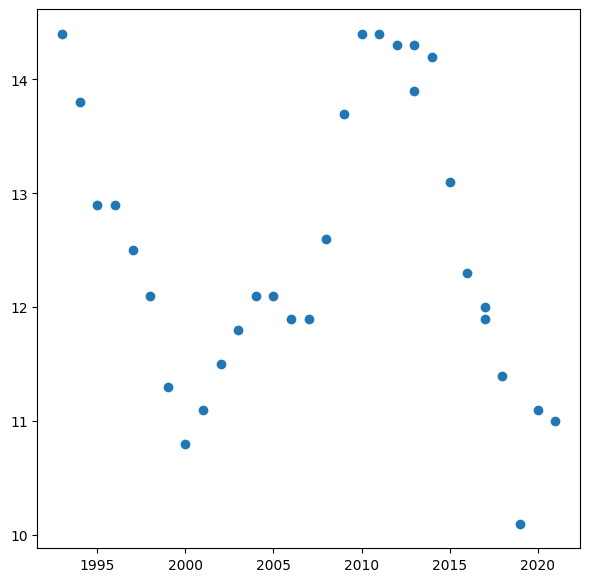

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter( x= dataNew['Year'], y =dataNew['Percent in Poverty'])

When creating the graph, 'Race' is the independent variable and 'Perent Below Poverty' is the dependet variable. Aka Percent Below Poverty Vs. Race

For better visualization they are distinguishable by color, which was done using a dictionary that stored race (key) and colors (value).

The make the table, we first used pandas groupby() to make groups by race. Then we iterated through these groups to print the rows according to their key (race) so that they have the right color. 

We used matplotlib plot() to make a scatter plot of the data. Documentation can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 

x is set to 'Race' and y to 'Percent Below Poverty'.

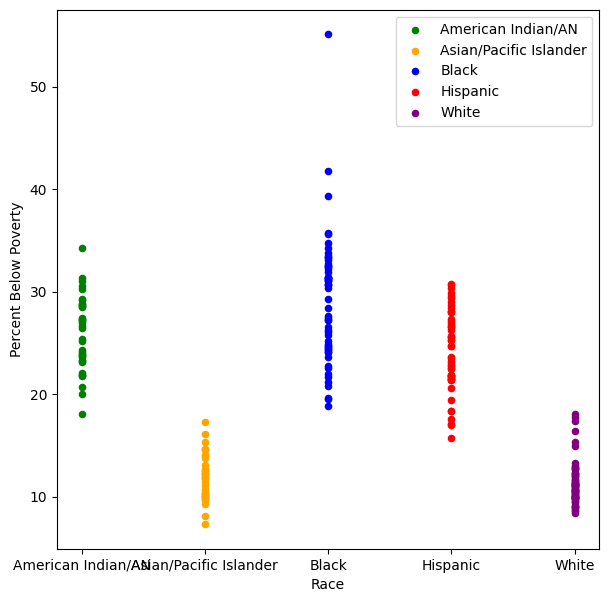

In [ ]:
colors = {"American Indian/AN" : "green", "Hispanic" : "red", "Black" : "blue", "White": "purple" , "Asian/Pacific Islander" : "orange"}

fig, ax = plt.subplots(figsize=(7, 7))
groupedDF = finalDF.groupby(['Race'])
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Race', label=key,color=colors[key])

plt.xlabel('Race')
plt.ylabel('Percent Below Poverty')
plt.show()

Here, you can see that certain races have higher 'Percent Below Poverty' points than others and in higher numbers. In other words, certain races have higher poverty rates and in higher amounts. 

Next, we're going to make a plot that shows Percent Below Poverty vs. Year, but we'll keep our color coding so we can distinguish by race.

To do this, we kept our grouping from the previous plot, but made a new plot and changed 'x' to 'Year'.

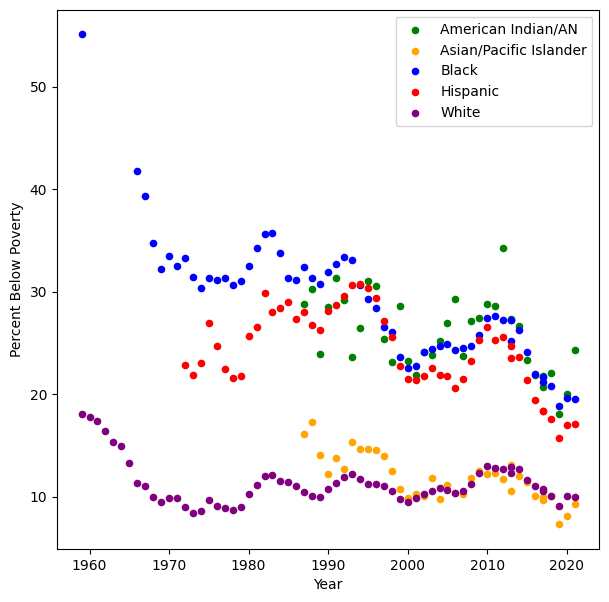

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
for key, group in groupedDF :
        group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()

This graph once again indicated that poverty rates are higher for certain races than for others, but also now shows that since 1960, poverty rates  -- although fluctuating -- across the board have been steadily been decreasing.

I dont know if we need the next sections.....

American Indian/AN:[343.4226586],[[-0.15840149]]
Asian/Pacific Islander:[336.60689782],[[-0.16201369]]
Black:[632.72875175],[[-0.30279529]]
Hispanic:[296.99674322],[[-0.13658207]]
White:[73.61915234],[[-0.03131719]]


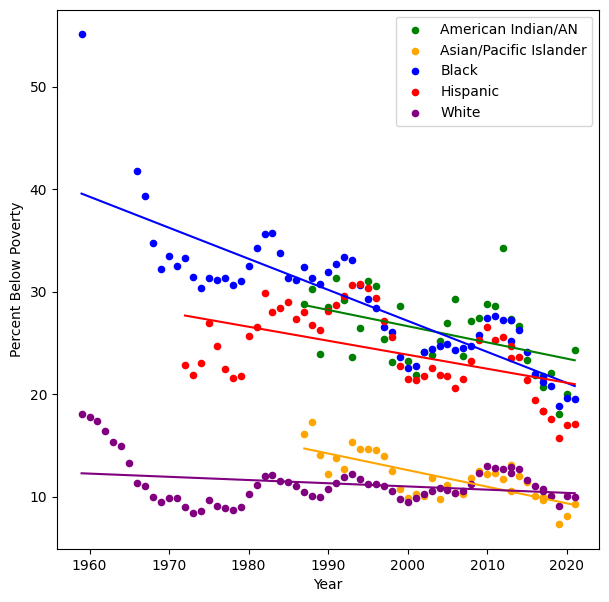

   Year  Total Number  Number Below Poverty  Percent Below Poverty      Race  \
0  2021         62482                 10690                   17.1  Hispanic   
1  2020         61769                 10520                   17.0  Hispanic   
2  2019         60602                  9545                   15.7  Hispanic   
3  2018         59957                 10526                   17.6  Hispanic   
4  2017         59051                 10816                   18.3  Hispanic   

  Prediction  
0             
1             
2             
3             
4             


In [ ]:
finalDF['Prediction'] = " "
groupedDF = finalDF.groupby(['Race'])
fig, ax = plt.subplots(figsize=(7, 7))
predictions = {"Year":[], "American Indian/AN" : [], "Hispanic" : [], "Black" :[], "White": [] , "Asian/Pacific Islander" : []}
for key, group in groupedDF :
    group.plot(ax = ax, kind='scatter', y='Percent Below Poverty', x='Year', label=key,color=colors[key])
    x = group['Year'].to_numpy().reshape(-1,1) #saving as valye bc will be using
    reg = LinearRegression().fit(x, group['Percent Below Poverty'].to_numpy().reshape(-1,1))
    race_y_pred = reg.predict(x) #using regression to predict values of y given values of x (can compare this prediction to actual)
    predictions [key].append(race_y_pred) 
    predictions['Year'] = x.astype(int).astype(str)
    plt.plot(x,race_y_pred, color = colors[key],  label = str(key) +  " RL")
    print(key +":" + str(reg.intercept_) + "," + str(reg.coef_)) #save for later

plt.xlabel('Year')
plt.ylabel('Percent Below Poverty')
plt.show()


# how to plot predicted values for each group?
print(finalDF.head())

Now, we're going to use statsmodels ols() function to get a linear regression of Percent Below Poverty ~ Race (essentially, PBP vs Race) and then summer() to print out the results. We're doing this to get a numerical representation of the relationships between Race and PBP to see if race is a statistically significant predictor of poverty. 

More information on these functions can be found here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html. 

In [ ]:
res = smf.ols(formula= "Q(\"Percent Below Poverty\") ~ Race", data=finalDF).fit()
print(res.summary())

                                OLS Regression Results                                
Dep. Variable:     Q("Percent Below Poverty")   R-squared:                       0.789
Model:                                    OLS   Adj. R-squared:                  0.785
Method:                         Least Squares   F-statistic:                     228.8
Date:                        Tue, 09 May 2023   Prob (F-statistic):           1.81e-81
Time:                                13:37:09   Log-Likelihood:                -696.93
No. Observations:                         250   AIC:                             1404.
Df Residuals:                             245   BIC:                             1421.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Considering that the probablity of the F-statistic (p-value) is close to 0, except for Hispanic, the null hypothesis of no relationship between race and percent below poverty is less likely to be valid. Therefore, we should utilize the predictions previously calculated to find how race correlates with the amount of percent below poverty each year.

Next,........

In [ ]:
predicts = pd.DataFrame(map(np.ravel, predictions.values()), index=predictions.keys()).T
newPredicts = pd.DataFrame({"Prediction" : pd.concat([predicts["Hispanic"].loc[0:51], predicts["White"], 
                                   predicts["Asian/Pacific Islander"].loc[0:36], predicts["Black"].loc[0:58], predicts["American Indian/AN"].loc[0:36]], ignore_index=True) })
newPredicts["Race"] = ""
newPredicts["Race"].loc[0:51] = "Hispanic"
newPredicts["Race"].loc[52:116] = "White"
newPredicts["Race"].loc[117:153] = "Asian/Pacific Islander"
newPredicts["Race"].loc[154:212] = "Black"
newPredicts["Race"].loc[213:] = "American Indian/AN"

newPredicts["Year"] = finalDF["Year"]

# newPredicts = newPredicts.iloc[::-1]

newPredicts

,Prediction,Race,Year
0,20.964384,Hispanic,2021
1,21.100966,Hispanic,2020
2,21.237548,Hispanic,2019
3,21.37413,Hispanic,2018
4,21.510713,Hispanic,2017
...,...,...,...
245,28.045296,American Indian/AN,1991
246,28.203697,American Indian/AN,1990
247,28.362099,American Indian/AN,1989
248,28.5205,American Indian/AN,1988


To have all the informaiton in one place, we'll add our predictions to our original df.

In [ ]:
finalDF["Prediction"] = newPredicts["Prediction"].astype(float)
finalDF

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race,Prediction
0,2021,62482,10690,17.1,Hispanic,20.964384
1,2020,61769,10520,17.0,Hispanic,21.100966
2,2019,60602,9545,15.7,Hispanic,21.237548
3,2018,59957,10526,17.6,Hispanic,21.374130
4,2017,59051,10816,18.3,Hispanic,21.510713
...,...,...,...,...,...,...
245,1991,1793,562,31.3,American Indian/AN,28.045296
246,1990,1560,444,28.5,American Indian/AN,28.203697
247,1989,1445,345,23.9,American Indian/AN,28.362099
248,1988,1454,440,30.2,American Indian/AN,28.520500


To visually guage the accuracy of the predictons made from the linear regression, we'll create a violin plot of the residuals. We'll use pythons seaborn package. Here's a detailed descriptions of seaborns violinplot() functions: https://seaborn.pydata.org/generated/seaborn.violinplot.html. 

We've started by creating the plot. Then we set the style and used ols's resid attribute to obtain the residuals of the linear regression. Then we used violinplot() to creat the plot with Race as x and Residuals as y.

,Year,Total Number,Number Below Poverty,Percent Below Poverty,Race,Prediction,Residuals
0,2021,62482,10690,17.1,Hispanic,,-7.113462
1,2020,61769,10520,17.0,Hispanic,,-7.213462
2,2019,60602,9545,15.7,Hispanic,,-8.513462
3,2018,59957,10526,17.6,Hispanic,,-6.613462
4,2017,59051,10816,18.3,Hispanic,,-5.913462
...,...,...,...,...,...,...,...
245,1991,1793,562,31.3,American Indian/AN,,5.408108
246,1990,1560,444,28.5,American Indian/AN,,2.608108
247,1989,1445,345,23.9,American Indian/AN,,-1.991892
248,1988,1454,440,30.2,American Indian/AN,,4.308108


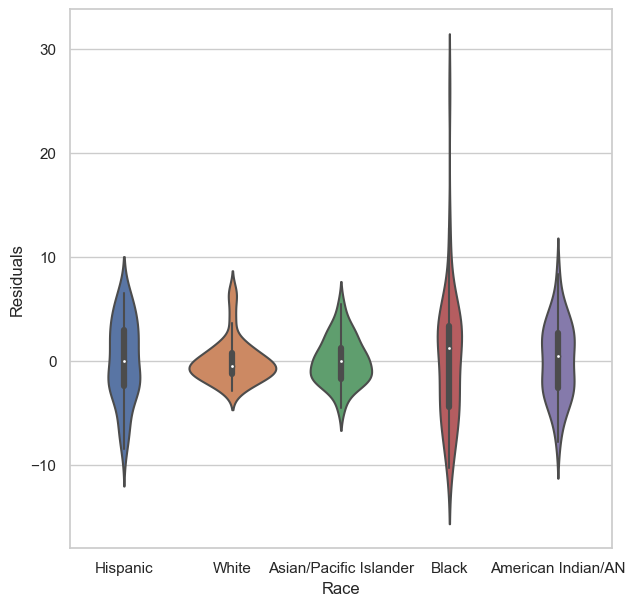

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
seaborn.set(style = 'whitegrid') 
finalDF['Residuals'] = res.resid
seaborn.violinplot( data = finalDF, x= 'Race', y='Residuals') 
plt.xlabel('Race')
plt.ylabel('Residuals')
finalDF

The results are consistent with what the residuals of a linea regression should look like. 
-  A median close to 0
- Majority participation about the mean 
- Small range, with lower participation near extremes
- Unimodal distribution 

Next, we'll tit the linear regression model for the predicted values vs Race interacting with the "Percent Below Poverty" to get a better idea of whether percent below poverty has a statistically significant impact on predictions of this value.

[Text(0.5, 1.0, 'Residuals vs Fitted Values Model')]

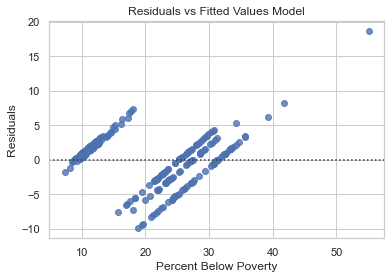

In [ ]:
# Residual plot for the fitted values
seaborn.residplot(data=finalDF, x= "Percent Below Poverty", y="Residuals").set(title="Residuals vs Fitted Values Model")

These results show.....

Now....

In [ ]:
newRes = smf.ols(formula= "Prediction ~ Race * Q(\"Percent Below Poverty\")", data=finalDF).fit()
print(newRes.summary())

                            OLS Regression Results                            
Dep. Variable:             Prediction   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     567.1
Date:                Mon, 08 May 2023   Prob (F-statistic):          2.85e-156
Time:                        21:29:34   Log-Likelihood:                -489.70
No. Observations:                 250   AIC:                             999.4
Df Residuals:                     240   BIC:                             1035.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

The fitted model tells us 2 things. Without the interaction term "Percent Below Poverty", the probability of the f-statistic is approximately 0 for every race except for Hispanic. Implying that the null hypothesis of no relation between prediction of percent below poverty and race is to be rejected. However, including the interaction term increases the probability of the f-statistic for both White and Hispanic over 0.05 implying our prediction model's interaction term has a statistically significant impact on Hispanic and White. The reason for this could be variables not accounted for in our data. This may imply our data's predictive power of Percent below poverty is high for every race besides Hispanic and White people.

Text(0, 0.5, 'Residuals for Predicted')

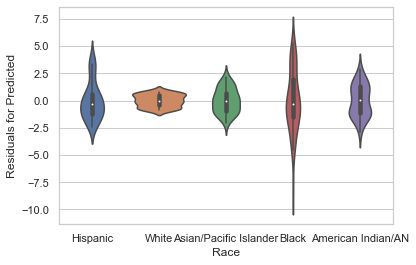

In [ ]:
finalDF["Residuals for Predicted"] = newRes.resid

seaborn.violinplot( data = finalDF, x= 'Race', y='Residuals for Predicted') 
plt.xlabel('Race')
plt.ylabel('Residuals for Predicted')

[Text(0.5, 1.0, 'Residuals for Predicted vs Fitted Values Model')]

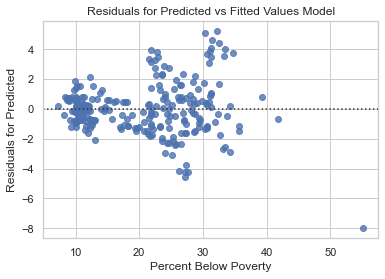

In [ ]:
seaborn.residplot(data=finalDF, x= "Percent Below Poverty", y="Residuals for Predicted").set(title="Residuals for Predicted vs Fitted Values Model")